In [1]:
import xarray as xr
f = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ERA_skin/sfc_skin_unstructured_2018_01.grib'
ds = xr.open_dataset(f,engine='cfgrib',filter_by_keys={'typeOfLevel': 'surface'})

Ignoring index file '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ERA_skin/sfc_skin_unstructured_2018_01.grib.923a8.idx' incompatible with GRIB file


In [3]:
ds

<xarray.Dataset>
Dimensions:     (time: 744, values: 542080)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2018-01-01 ... 2018-01-31T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (values) float64 ...
    longitude   (values) float64 ...
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: values
Data variables: (12/18)
    aluvp       (time, values) float32 ...
    aluvd       (time, values) float32 ...
    alnip       (time, values) float32 ...
    alnid       (time, values) float32 ...
    cl          (time, values) float32 ...
    cvl         (time, values) float32 ...
    ...          ...
    isor        (time, values) float32 ...
    anor        (time, values) float32 ...
    slor        (time, values) float32 ...
    d2m         (time, values) float32 ...
    lsm         (time, values) float32 ...
    fal         (time, values) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-03-10T17:45 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
ds.time

<xarray.DataArray 'time' (time: 744)>
array(['2018-01-01T00:00:00.000000000', '2018-01-01T01:00:00.000000000',
       '2018-01-01T02:00:00.000000000', ..., '2018-01-31T21:00:00.000000000',
       '2018-01-31T22:00:00.000000000', '2018-01-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2018-01-01 ... 2018-01-31T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 2018-01-01 ... 2018-01-31T23:00:00
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [9]:
ds = ds.assign_coords({"time": ds.time.dt.round(freq='D')})

In [13]:
day = ds.sel(time = "2018-01-01T00:00:00.000000000")

In [37]:
day

<xarray.Dataset>
Dimensions:     (time: 13, values: 542080)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2018-01-01 2018-01-01 ... 2018-01-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    latitude    (values) float64 89.78 89.78 89.78 ... -89.78 -89.78 -89.78
    longitude   (values) float64 0.0 20.0 40.0 60.0 ... 280.0 300.0 320.0 340.0
    valid_time  (time) datetime64[ns] 2018-01-01 ... 2018-01-01T12:00:00
Dimensions without coordinates: values
Data variables: (12/18)
    aluvp       (time, values) float32 0.05999 0.05999 0.05999 ... 0.15 0.15
    aluvd       (time, values) float32 0.06001 0.06001 0.06001 ... 0.15 0.15
    alnip       (time, values) float32 0.06 0.06 0.06 0.06 ... 0.15 0.15 0.15
    alnid       (time, values) float32 0.06 0.06 0.06 0.06 ... 0.15 0.15 0.15
    cl          (time, values) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cvl         (time, values) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...          ...
    isor        (time, values) float32 0.0 0.0 0.0 0.0 ... 0.4174 0.3814 0.1614
    anor        (time, values) float32 0.7854 0.7854 0.7854 ... 0.229 0.1351
    slor        (time, values) float32 0.0001 0.0001 ... 0.000862 0.001256
    d2m         (time, values) float32 249.1 249.1 249.0 ... 245.3 245.2 245.2
    lsm         (time, values) float32 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    fal         (time, values) float32 0.7656 0.7656 0.7656 ... 0.85 0.85 0.85
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-03-10T17:45 GRIB to CDM+CF via cfgrib-0.9.1...

In [40]:
import pandas as pd
def plot_map(ds,x,y,q): #slow plotting function

    #Takes a ds, converts to pandas df
    
    if isinstance(ds, pd.DataFrame):
        df = ds
    else:
        df = ds.to_dataframe().reset_index().dropna()
        
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[x], df[y]))
    
    #Plot the world
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax=world.boundary.plot(figsize=(24,12))
    
    gdf.plot(ax=ax,column=q,cmap='plasma',markersize=1)
    
    plt.show()

In [32]:
day_df = day.to_dataframe().reset_index()

In [33]:
day_df

,time,values,number,step,surface,latitude,longitude,valid_time,aluvp,aluvd,...,sdfor,z,sd,sdor,isor,anor,slor,d2m,lsm,fal
0,2018-01-01,0,0,0 days,0.0,89.784877,0.0,2018-01-01 00:00:00,0.059992,0.060009,...,0.000000,5.503662,0.0,0.000000,0.000000,0.785398,0.000100,249.130142,0.0,0.765625
1,2018-01-01,1,0,0 days,0.0,89.784877,20.0,2018-01-01 00:00:00,0.059992,0.060009,...,0.000000,6.609131,0.0,0.000000,0.000000,0.785398,0.000100,249.114517,0.0,0.765625
2,2018-01-01,2,0,0 days,0.0,89.784877,40.0,2018-01-01 00:00:00,0.059992,0.060009,...,0.000000,5.077881,0.0,0.000000,0.000000,0.785398,0.000100,249.005142,0.0,0.765625
3,2018-01-01,3,0,0 days,0.0,89.784877,60.0,2018-01-01 00:00:00,0.059992,0.060009,...,0.000000,2.906006,0.0,0.000000,0.000000,0.785398,0.000100,248.930923,0.0,0.765625
4,2018-01-01,4,0,0 days,0.0,89.784877,80.0,2018-01-01 00:00:00,0.059992,0.060009,...,0.000000,1.370850,0.0,0.000000,0.000000,0.785398,0.000100,248.868423,0.0,0.765625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047035,2018-01-01,542075,0,0 days,0.0,-89.784877,260.0,2018-01-01 12:00:00,0.149994,0.149997,...,0.830017,27070.917969,10.0,2.146240,0.068906,-0.123501,0.002210,245.179260,1.0,0.850002
7047036,2018-01-01,542076,0,0 days,0.0,-89.784877,280.0,2018-01-01 12:00:00,0.149994,0.149997,...,0.781799,27001.785156,10.0,3.880493,0.101069,-0.203273,0.001679,245.235901,1.0,0.850002
7047037,2018-01-01,542077,0,0 days,0.0,-89.784877,300.0,2018-01-01 12:00:00,0.149994,0.149997,...,0.576355,26972.625000,10.0,5.408325,0.417360,-0.395258,0.000831,245.261292,1.0,0.850002
7047038,2018-01-01,542078,0,0 days,0.0,-89.784877,320.0,2018-01-01 12:00:00,0.149994,0.149997,...,0.427917,26996.261719,10.0,5.480469,0.381358,0.229033,0.000862,245.249573,1.0,0.850002


In [35]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(day_df, geometry=gpd.points_from_xy(day_df['longitude'], day_df['latitude']))

In [38]:
gdf

,time,values,number,step,surface,latitude,longitude,valid_time,aluvp,aluvd,...,z,sd,sdor,isor,anor,slor,d2m,lsm,fal,geometry
0,2018-01-01,0,0,0 days,0.0,89.784877,0.0,2018-01-01 00:00:00,0.059992,0.060009,...,5.503662,0.0,0.000000,0.000000,0.785398,0.000100,249.130142,0.0,0.765625,POINT (0.000 89.785)
1,2018-01-01,1,0,0 days,0.0,89.784877,20.0,2018-01-01 00:00:00,0.059992,0.060009,...,6.609131,0.0,0.000000,0.000000,0.785398,0.000100,249.114517,0.0,0.765625,POINT (20.000 89.785)
2,2018-01-01,2,0,0 days,0.0,89.784877,40.0,2018-01-01 00:00:00,0.059992,0.060009,...,5.077881,0.0,0.000000,0.000000,0.785398,0.000100,249.005142,0.0,0.765625,POINT (40.000 89.785)
3,2018-01-01,3,0,0 days,0.0,89.784877,60.0,2018-01-01 00:00:00,0.059992,0.060009,...,2.906006,0.0,0.000000,0.000000,0.785398,0.000100,248.930923,0.0,0.765625,POINT (60.000 89.785)
4,2018-01-01,4,0,0 days,0.0,89.784877,80.0,2018-01-01 00:00:00,0.059992,0.060009,...,1.370850,0.0,0.000000,0.000000,0.785398,0.000100,248.868423,0.0,0.765625,POINT (80.000 89.785)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047035,2018-01-01,542075,0,0 days,0.0,-89.784877,260.0,2018-01-01 12:00:00,0.149994,0.149997,...,27070.917969,10.0,2.146240,0.068906,-0.123501,0.002210,245.179260,1.0,0.850002,POINT (260.000 -89.785)
7047036,2018-01-01,542076,0,0 days,0.0,-89.784877,280.0,2018-01-01 12:00:00,0.149994,0.149997,...,27001.785156,10.0,3.880493,0.101069,-0.203273,0.001679,245.235901,1.0,0.850002,POINT (280.000 -89.785)
7047037,2018-01-01,542077,0,0 days,0.0,-89.784877,300.0,2018-01-01 12:00:00,0.149994,0.149997,...,26972.625000,10.0,5.408325,0.417360,-0.395258,0.000831,245.261292,1.0,0.850002,POINT (300.000 -89.785)
7047038,2018-01-01,542078,0,0 days,0.0,-89.784877,320.0,2018-01-01 12:00:00,0.149994,0.149997,...,26996.261719,10.0,5.480469,0.381358,0.229033,0.000862,245.249573,1.0,0.850002,POINT (320.000 -89.785)


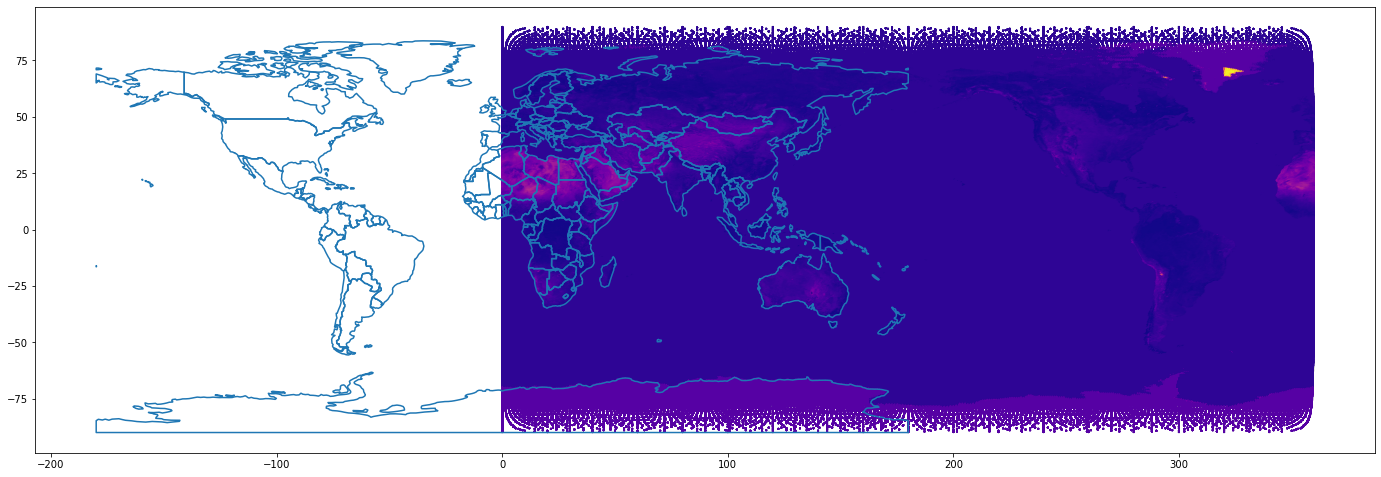

In [41]:
plot_map(gdf,'longitude','latitude','aluvp')

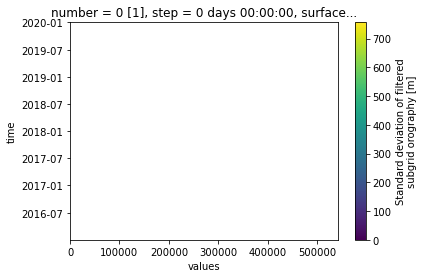

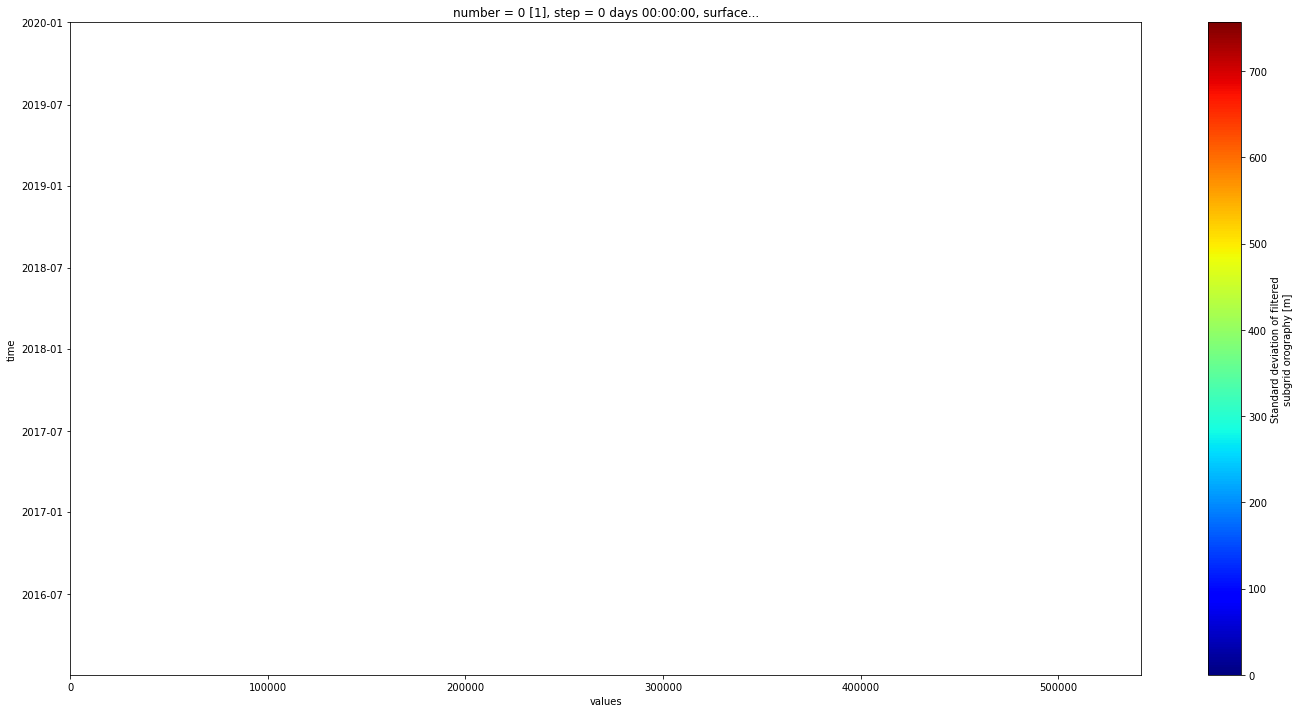

In [24]:
import matplotlib.pyplot as plt
day['sdfor'].plot()

fig = plt.figure(figsize=[24,12])
ax = fig.add_subplot(111)
day['sdfor'].plot(ax=ax,cmap='jet')
#ax.coastlines()
#plt.show()

In [19]:
day.aluvd.data

array([[0.0600094 , 0.0600094 , 0.0600094 , ..., 0.15000573, 0.15000573,
        0.15000573],
       [0.06000992, 0.06000992, 0.06000992, ..., 0.15000626, 0.15000626,
        0.15000626],
       [0.06001045, 0.06001045, 0.06001045, ..., 0.15000679, 0.15000679,
        0.15000679],
       ...,
       [0.05999942, 0.05999942, 0.05999942, ..., 0.14999576, 0.14999576,
        0.14999576],
       [0.05999995, 0.05999995, 0.05999995, ..., 0.1499963 , 0.1499963 ,
        0.1499963 ],
       [0.06000048, 0.06000048, 0.06000048, ..., 0.14999682, 0.14999682,
        0.14999682]], dtype=float32)